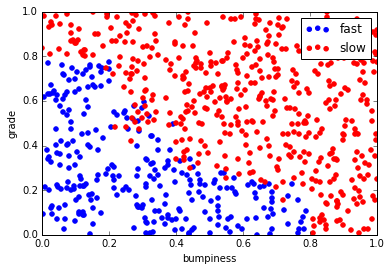

In [4]:
import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

%matplotlib inline
#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

def prettyPictures(kmeans, reduced_data):
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
    plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [18]:
import numpy as np
from time import time
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

n_labels = len(np.unique(labels_train))
data=np.asarray(features_train,'float32')
sample_size = len(labels_train)
t0=time()
pca = PCA(n_components=n_labels).fit(data)
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_labels, n_init=10)
kmeans.fit(reduced_data)


print "prediction time:", round(time()-t0, 3), "s"            

prediction time: 0.098 s


In [19]:
from sklearn.metrics import accuracy_score
t0=time()
reduced_test = PCA(n_components=2).fit_transform(np.asarray(features_test,'float32'))
pred=kmeans.predict(reduced_test)
print "prediction time:", round(time()-t0, 3), "s"
accuracy_score(labels_test, pred, normalize=True, sample_weight=None)

prediction time: 0.005 s


0.80400000000000005

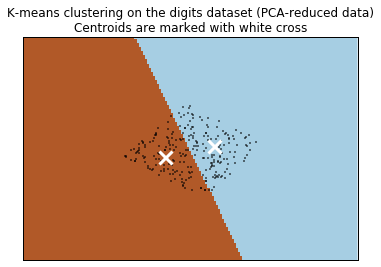

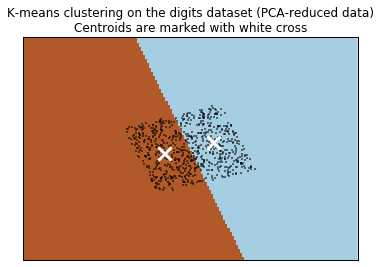

In [20]:
prettyPictures(kmeans, reduced_test)
prettyPictures(kmeans, reduced_data)

In [113]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clfknn = NearestCentroid(metric='euclidean',shrink_threshold=.1)
t0=time()
clfknn.fit(features_train, labels_train)
print "prediction time:", round(time()-t0, 3), "s"
#NearestCentroid(metric='euclidean', shrink_threshold=None)

prediction time: 0.007 s


In [114]:
t0=time()
pred = clfknn.predict(features_test)
print "prediction time:", round(time()-t0, 3), "s"
accuracy_score(labels_test, pred, normalize=True, sample_weight=None)

prediction time: 0.001 s


0.90800000000000003

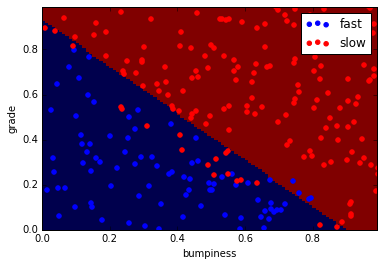

In [115]:
prettyPicture(clfknn,features_test,labels_test)


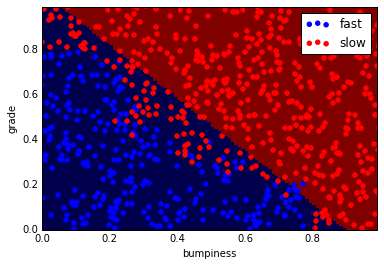

In [66]:
prettyPicture(clfknn,features_train,labels_train)

In [129]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
clfada = AdaBoostClassifier(RandomForestClassifier(max_depth=2, n_estimators=201, max_features=1),
                         algorithm="SAMME",
                         n_estimators=300)
t0=time()
clfada.fit(features_train, labels_train)
print "prediction time:", round(time()-t0, 3), "s"


prediction time: 306.537 s


In [130]:
t0=time()
pred = clfada.predict(features_test)
print "prediction time:", round(time()-t0, 3), "s"
accuracy_score(labels_test, pred, normalize=True, sample_weight=None)

prediction time: 11.341 s


0.91200000000000003

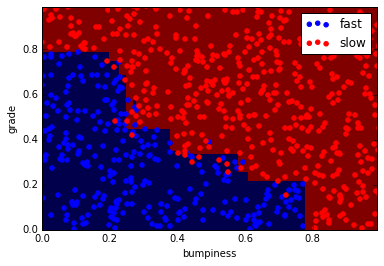

In [88]:
prettyPicture(clfada,features_train,labels_train)

In [110]:
from sklearn.ensemble import RandomForestClassifier
clfrf =  RandomForestClassifier(max_depth=6, n_estimators=201, max_features=1)
t0=time()
clfrf.fit(features_train, labels_train)
print "prediction time:", round(time()-t0, 3), "s"

prediction time: 1.028 s


In [111]:
t0=time()
pred = clfrf.predict(features_test)
print "prediction time:", round(time()-t0, 3), "s"
accuracy_score(labels_test, pred, normalize=True, sample_weight=None)

prediction time: 0.079 s


0.92400000000000004

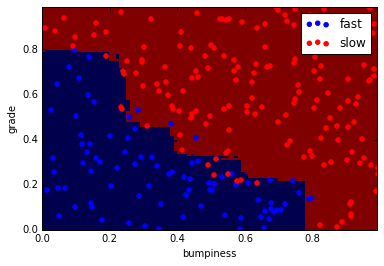

In [112]:
prettyPicture(clfrf,features_test,labels_test)